In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [2]:
LANGCHAIN_PROJECT

'langchain-agent'

chatGroq_mode = https://console.groq.com/docs/models

HuggingFaceMode = https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [3]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [5]:
llm.invoke("hi,how are you?")

AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to help!\n\nIs there anything you'd like to ask or talk about?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 15, 'total_tokens': 53, 'completion_time': 0.069090909, 'prompt_time': 0.00011084, 'queue_time': 0.013772691, 'total_time': 0.069201749}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-79a23524-2a79-4649-8a95-af492a647568-0', usage_metadata={'input_tokens': 15, 'output_tokens': 38, 'total_tokens': 53})

# Predefine tools

In [5]:
from langchain_community.tools import WikipediaQueryRun # allows to query Wikipedia for information directly within a Langchain pipeline
from langchain_community.utilities import WikipediaAPIWrapper # interact with the Wikipedia

api_wrapper = WikipediaAPIWrapper()

tool = WikipediaQueryRun(api_wrapper=api_wrapper)

print(tool.run({"query": "langchan"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.



Page: Retrieval-augmented generation
Summary: Retrieval augmented generation (RAG) is a type of generative artificial intelligence that has information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information in preference to information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data, or giving factual information only from an authoritative source.



Page: DataStax
Sum

In [6]:
from langchain_community.tools import YouTubeSearchTool # interact with YouTube API
tool2=YouTubeSearchTool()
tool2.run("sunny savita")

"['https://www.youtube.com/watch?v=8aUYzb1aYDU&pp=ygUMc3Vubnkgc2F2aXRh', 'https://www.youtube.com/watch?v=Ik8gNjJ-13I&pp=ygUMc3Vubnkgc2F2aXRh']"

In [7]:
from langchain_community.tools import YouTubeSearchTool
tool2=YouTubeSearchTool()
tool2.run("carry minati")

"['https://www.youtube.com/watch?v=WX7DBPcsiEs&pp=ygUMY2FycnkgbWluYXRp', 'https://www.youtube.com/watch?v=P8P_S1Fjl_Q&pp=ygUMY2FycnkgbWluYXRp']"

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults # interact with web search
tool = TavilySearchResults()
tool.invoke({"query": "who is mohandas karamchand gandhi?"})

[{'url': 'https://www.encyclopedia.com/people/history/south-asian-history-biographies/mohandas-karamchand-gandhi',
  'content': "Mohandas Karamchand Gandhi (1869-1948) was an Indian revolutionary religious leader who used his religious power for political and social reform. Although he held no governmental office, he was the prime mover in the struggle for independence of the world's second-largest nation."},
 {'url': 'https://historycooperative.org/stay-story-mahatma-gandhi/',
  'content': "Mahatma Gandhi, also known as Mohandas Karamchand Gandhi, was a prominent figure in India's struggle for independence from British rule. His approach to non-violent protest and civil disobedience became a beacon for peaceful movements worldwide. Gandhi's beliefs in simplicity, non-violence, and truth had a profound impact on the world, influencing other leaders like Martin Luther"},
 {'url': 'https://www.gandhi-manibhavan.org/about-gandhi/biography.html',
  'content': 'Mohandas Karamchand Gandhi wa

# Create a Custom tool

In [9]:
from langchain.agents import tool
@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)

In [10]:
get_word_length.invoke("abc")

3

In [11]:
get_word_length.invoke("sunny savita")

12

In [14]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [12]:
@tool
def summisation(a: int, b: int) -> int:
    """Adding two numbers."""
    return a + b

In [15]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [16]:
print(summisation.name)
print(summisation.description)
print(summisation.args)

summisation
Adding two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [17]:
multiply.invoke({"a":10,"b":20})

200

In [18]:
summisation.invoke({"a":10,"b":20})

30

### Concept of Agents

### This Agent class from the first version of LangChain(lagacy)

### they updated it towards the different classes

agent_docs = https://python.langchain.com/v0.1/docs/modules/agents/

agent_github = https://github.com/langchain-ai/langchain/tree/master/libs/langchain/langchain/agents

Conceptual guide = https://python.langchain.com/docs/concepts/

In [19]:
from langchain.agents import AgentType
from langchain.agents import load_tools 
from langchain.agents import initialize_agent

Set up an AI Agent: The code initializes an AI agent capable of answering questions.

Check LLM Knowledge: It first tries to answer using the LLM's internal knowledge.

Use External Tool: If the LLM lacks the answer, it uses the Wikipedia tool to fetch real-time information.

Combine Results: The agent combines the LLM's response and Wikipedia's data (if fetched) to provide an accurate answer.

In [20]:
tool=load_tools(["wikipedia"],llm=llm)

In [21]:
agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

C:\Users\sunny\AppData\Local\Temp\ipykernel_21796\2645007812.py:1: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)


In [23]:
agent.run("what is llama and who create this llm model?")



> Entering new AgentExecutor chain...
Question: what is llama and who create this llm model?
Thought: I need to look up information about Llama and its creators. 
Action: wikipedia
Action Input: Llama (language model)

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\sunny\langgraph-end-to-end\env\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.2, released in September 2024.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the model were shared via BitTorrent. In response, Meta AI issued DMCA takedown requests against repositories sharing the link on GitHub. Subsequent versions of Llama were made accessible outside academia and released under licenses that permitted some commercial use. Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.

'Llama is a family of large language models (LLMs) created by Meta AI.'

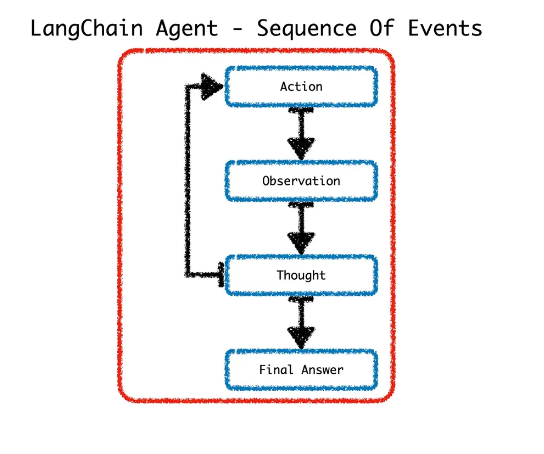

A **Tool Calling Agent** refers to an AI system or framework that dynamically invokes external tools or APIs to accomplish tasks as part of its decision-making process. Instead of relying solely on internal reasoning or knowledge, the agent calls specific tools to perform actions like calculations, searches, or other operations. This type of agent is often used in real-world applications where tasks require interaction with external systems.

Tool calling agent = https://python.langchain.com/v0.1/docs/modules/agents/agent_types/tool_calling/

In [6]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [7]:
search = TavilySearchResults() # tool to perform web or news-based searches

In [8]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1728027312, 'localtime': '2024-10-04 00:35'}, 'current': {'last_updated_epoch': 1728027000, 'last_updated': '2024-10-04 00:30', 'temp_c': 11.2, 'temp_f': 52.2, 'is_day': 0, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/night/143.png', 'code': 1030}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 274, 'wind_dir': 'W', 'pressure_mb': 1010.0, 'pressure_in': 29.83, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 94, 'cloud': 100, 'feelslike_c': 10.4, 'feelslike_f': 50.8, 'windchill_c': 13.1, 'windchill_f': 55.5, 'heatindex_c': 12.9, 'heatindex_f': 55.3, 'dewpoint_c': 12.0, 'dewpoint_f': 53.7, 'vis_km': 9.7, 'vis_miles': 6.0, 'uv': 1.0, 'gust_mph': 10.3, 'gust_kph': 16.6}}"},
 {'url': 'https://weatherspark.com/h/m/557/2024/4/

In [9]:
tools = [search] # search(tool) is added to the tools list, making it available to the agent for use during execution

In [10]:
from langchain import hub # pull prebuilt templates or prompts from the LangChain community or repository.

prebuilt_prompt_template = https://smith.langchain.com/hub/hwchase17/openai-functions-agent

In [11]:
prompt=hub.pull("hwchase17/openai-functions-agent") # Pulls a prebuilt prompt template from the LangChain Hub

In [18]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

In [12]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

**agent_scratchpad:** The agent does not call a tool just once to get the desired answer, but has a structure that calls tools repeatedly until the desired answer is obtained. Each time you call a tool, what the previous call was like, information about the previous call, and the result are stored in this field.

#### What is a **Tool-Calling Agent**?
Think of a **tool-calling agent** as a smart assistant that can:

Understand what you’re asking (using an AI language model like ChatGPT, GPT-4, etc.).

Decide if it needs help from external tools to give you the answer.

Use the right tools to fetch the required information or perform actions.

Combine the tool’s output with its own knowledge to give you a complete, helpful response.

A **tool-calling agent** allows your LLM (language model) to interact with external tools, systems, or sources of information to:

Expand its knowledge beyond what it was trained on.


Perform specific tasks like searching the web, making calculations, querying databases, or calling APIs.

Tool calling agent = https://python.langchain.com/v0.1/docs/modules/agents/agent_types/tool_calling/

create_tool_calling_agent = https://api.python.langchain.com/en/latest/agents/langchain.agents.tool_calling_agent.base.create_tool_calling_agent.html

In [14]:
from langchain.agents import create_tool_calling_agent # construct a tool-calling agent.
agent = create_tool_calling_agent(llm, tools, prompt)

In [15]:
from langchain.agents import AgentExecutor # execute agent with tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [16]:
agent_executor.invoke({"input": "hello how are you?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'how are you'}`


[{'url': 'https://www.eslbuzz.com/how-are-you/', 'content': 'Here are some funny ways to say "how are you" in English: " What\'s shaking, bacon?". - This is a playful and informal way of asking "how are you.". It is often used jokingly or among friends and the word "bacon" is used as a friendly term of address. " How\'s your head, (fuzzy, clear, etc)?".'}, {'url': 'https://7esl.com/how-are-you/', 'content': '7ESL » Expressions » Phrases » 40 Other Ways to Ask “How Are You” in English\n40 Other Ways to Ask “How Are You” in English\nThe way that you ask someone “how are you?” may vary depending on who is being asked and in what setting the conversation is taking place. Related links:\n21 thoughts on “40 Other Ways to Ask “How Are You” in English”\nComment navigation\nWhat’s new\nI like lessons\nThank you\nGood\nTHANKS ALOT! How’s it rolling?\nComment navigation\nLeave a Comme

{'input': 'hello how are you?', 'output': ''}

In [17]:
agent_executor.invoke({"input": "whats the weather in sf?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in san francisco'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1728027546, 'localtime': '2024-10-04 00:39'}, 'current': {'last_updated_epoch': 1728027000, 'last_updated': '2024-10-04 00:30', 'temp_c': 11.2, 'temp_f': 52.2, 'is_day': 0, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/night/143.png', 'code': 1030}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 274, 'wind_dir': 'W', 'pressure_mb': 1010.0, 'pressure_in': 29.83, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 94, 'cloud': 100, 'feelslike_c': 10.4, 'feelslike_f': 50.8, 'windchill_c': 13.1, 'windchill_f': 55.5, 'heatindex_c': 12.9, 'heatindex_f': 55.3, 'dewpoint_c': 12.0, 'dewpoint_f': 53.7, 'vis_km':

{'input': 'whats the weather in sf?', 'output': '65°F  \n'}

1. RAG tool
2. ReAct
3. custom tool with ReAct agent
3. agent code from latest versions(v0.2 and v0.3)

### Implimentation of RAG with Agent

In [19]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [20]:
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

In [21]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)

embeddings = https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [22]:
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [23]:
retriever.invoke("how to upload a dataset")[0]

Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='description="A sample dataset in LangSmith.")client.create_examples(    inputs=[        {"postfix": "to LangSmith"},        {"postfix": "to Evaluations in LangSmith"},    ],    outputs=[        {"output": "Welcome to LangSmith"},        {"output": "Welcome to Evaluations in LangSmith"},    ],    dataset_id=dataset.id,)# Define your evaluatordef exact_match(run, example):    return {"score": run.outputs["output"] == example.outputs["output"]}experiment_results = evaluate(    lambda input: "Welcome " + input[\'postfix\'], # Your AI system goes here    data=dataset_name,

In [24]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool( # retriever tool
    retriever,
    "langsmith_search", # name of this tool
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!", # description of what the tool does
)

In [ ]:
# search = TavilySearchResults() # tool to perform web or news-based searches

In [25]:
tools = [search, retriever_tool] # search and retriever_too is added to tools list, making it available to agent for use during execution

In [26]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [27]:
from langchain.agents import AgentExecutor # execute agent with tools

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [28]:
agent_executor.invoke({"input": "hi! what is a langsmith?"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'what is a langsmith'}`


Get started with LangSmith | 🦜️🛠️ LangSmith

Log your first trace​Tracing to LangSmith for LangChain usersThere is no need to use the LangSmith SDK directly if your application is built entirely on LangChain (either Python and JS).We've outlined a tracing guide specifically for LangChain users here.We provide multiple ways to log traces to LangSmith. Below, we'll highlight

Skip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith​PythonTypeScriptpip install -U langsmithyarn add langs

{'input': 'hi! what is a langsmith?',
 'output': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. \n'}

In [29]:
agent_executor.invoke({"input": "whats the weather in sf?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in san francisco'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1728030028, 'localtime': '2024-10-04 01:20'}, 'current': {'last_updated_epoch': 1728029700, 'last_updated': '2024-10-04 01:15', 'temp_c': 12.9, 'temp_f': 55.3, 'is_day': 0, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/night/143.png', 'code': 1030}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 274, 'wind_dir': 'W', 'pressure_mb': 1009.0, 'pressure_in': 29.81, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 94, 'cloud': 52, 'feelslike_c': 13.1, 'feelslike_f': 55.5, 'windchill_c': 13.1, 'windchill_f': 55.5, 'heatindex_c': 12.9, 'heatindex_f': 55.3, 'dewpoint_c': 12.0, 'dewpoint_f': 53.7, 'vis_km': 

{'input': 'whats the weather in sf?',
 'output': 'It is 12.9 degrees Celsius and 55.3 degrees Fahrenheit in San Francisco.'}

# Add memory component

In [30]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [33]:
message_history=ChatMessageHistory()

In [34]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    lambda session_id: message_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [35]:
agent_with_chat_history.invoke(
    {"input": "hi! my name is sunny how are you?"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "firstchat"}},
)



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'How are you?'}`


[{'url': 'https://7esl.com/how-are-you/', 'content': '7ESL » Expressions » Phrases » 40 Other Ways to Ask “How Are You” in English\n40 Other Ways to Ask “How Are You” in English\nThe way that you ask someone “how are you?” may vary depending on who is being asked and in what setting the conversation is taking place. Related links:\n21 thoughts on “40 Other Ways to Ask “How Are You” in English”\nComment navigation\nWhat’s new\nI like lessons\nThank you\nGood\nTHANKS ALOT! How’s it rolling?\nComment navigation\nLeave a Comment Cancel reply\nComment\nΔ\nFree Courses\nLevel Tests\nCompany\nFollow Us The list below shows different ways to ask “How Are You” in English that you can use in your daily English conversations.\n Idiomatic Ways to Ask “How Are You?”\nThese are playful, casual ways to find out how your buddy or pal is doing.'}, {'url': 'https://eslforums.com/how-are-you

{'input': 'hi! my name is sunny how are you?',
 'chat_history': [],
 'output': ''}

#### ReAct Agent (Reasoning + Acting):

**Definition:**

- The ReAct framework combines reasoning and acting in a single loop to handle tasks. The agent uses natural language reasoning (thinking through steps) and task actions (performing tasks like calculations or data retrieval).

- The agent uses a combination of reasoning steps to guide actions in real-time, using feedback from those actions to further inform the next step in reasoning.

**How it works:**

- Step 1: The agent receives a question or task.
- Step 2: It reasons aloud (in natural language) about how to solve it.
- Step 3: Based on its reasoning, it takes actions (e.g., searching a database, calculating something).
- Step 4: The results of these actions are integrated into its reasoning and may trigger further actions.
- Step 5: It repeats the process until it arrives at a solution.

**Key points:**

- Combines thinking and doing (reasoning and actions).
- Performs iterative steps, updating its process based on action results.
- Typically handles complex decision-making scenarios.

**Example:**

- Original task: “Calculate the total number of apples in a basket if there are 4 baskets and 7 apples in each.”
- Reasoning: "I need to multiply 4 by 7 to get the total number of apples."
- Action: Perform the multiplication.
- Result: "There are 28 apples."
- Reasoning: "I am done."

**ReAct doc** = https://python.langchain.com/v0.1/docs/modules/agents/agent_types/react/

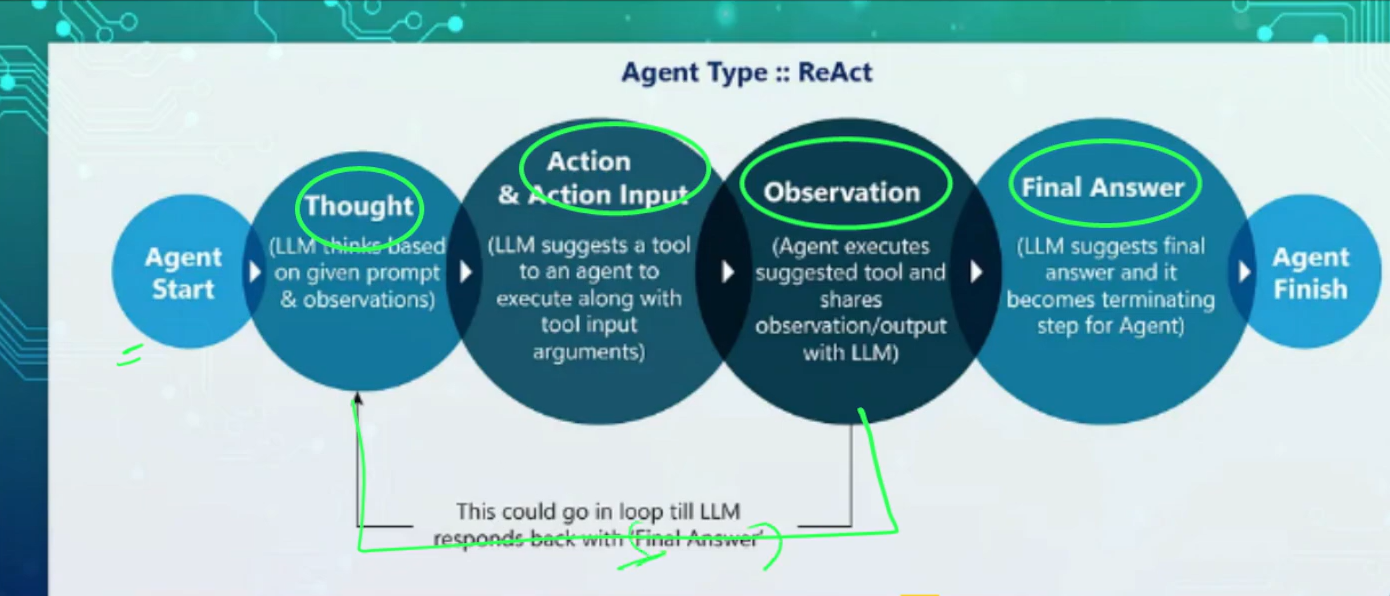

In [44]:
from langchain.utilities import GoogleSerperAPIWrapper # interact with the Google SerpAPI
from langchain.agents import Tool # Tool in LangChain represents a utility or action the agent can perform.
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor # Executing any tools the agent decides to use
from langchain.agents import create_react_agent # creates a ReAct agent (Reason + Act)

In [47]:
google_search = GoogleSerperAPIWrapper()
tools = [ # list of tools the agent can use
    Tool(
        name="Intermediate Answer",
        func=google_search.run, # function that the tool will call to search for the required information on Google
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [48]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [49]:
prompt = PromptTemplate.from_template(template)

In [50]:
# creating ReAct Agent that decides:
# What to do with the user query.
# Which tool(s) to call, and in what order.

search_agent = create_react_agent(llm,tools,prompt)

In [51]:
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True, # Returns intermediate steps taken by agent, such as Which tools were called, Inputs/Outputs to those tools
)

In [52]:
agent_executor.invoke({"input": "Where is the hometown of the 2007 US PGA championship winner and his score?"})



> Entering new AgentExecutor chain...
Thought: I need to find out who won the 2007 US PGA Championship.
Action: Intermediate Answer
Action Input: Who won the 2007 US PGA Championship?Tiger Woods claimed his fourth PGA Championship and improved to 13–0 in major championships when holding at least a share of the 54-hole lead. He led by as many as five strokes in the third and fourth rounds.Thought: I need to find out Tiger Woods' hometown. 
Action: Intermediate Answer
Action Input: What is Tiger Woods' hometown?Woods was born on December 30, 1975, in Cypress, California, to Earl and Kultida "Tida" Woods. He is their only child, though he has two half-brothers and a half-sister from his father's first marriage.Thought: I now know the final answer
Final Answer: Tiger Woods' hometown is Cypress, California. He won the 2007 US PGA Championship with a score of 12 under par.  


> Finished chain.


{'input': 'Where is the hometown of the 2007 US PGA championship winner and his score?',
 'output': "Tiger Woods' hometown is Cypress, California. He won the 2007 US PGA Championship with a score of 12 under par.",
 'intermediate_steps': [(AgentAction(tool='Intermediate Answer', tool_input='Who won the 2007 US PGA Championship?', log='Thought: I need to find out who won the 2007 US PGA Championship.\nAction: Intermediate Answer\nAction Input: Who won the 2007 US PGA Championship?'),
   'Tiger Woods claimed his fourth PGA Championship and improved to 13–0 in major championships when holding at least a share of the 54-hole lead. He led by as many as five strokes in the third and fourth rounds.'),
  (AgentAction(tool='Intermediate Answer', tool_input="What is Tiger Woods' hometown?", log="Thought: I need to find out Tiger Woods' hometown. \nAction: Intermediate Answer\nAction Input: What is Tiger Woods' hometown?"),
   'Woods was born on December 30, 1975, in Cypress, California, to Earl 

## ReAct Agent with Custom tools

In [45]:
from langchain.tools import tool
from langchain import hub # # pull prebuilt templates or prompts from the LangChain community or repository.
from langchain.agents import AgentExecutor, create_react_agent

In [53]:
# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

In [60]:
# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

prebuilt_prompt_template = https://smith.langchain.com/hub/hwchase17/react

In [62]:
# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react") # Pulls a prebuilt prompt template from the LangChain Hub

In [73]:
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [63]:
tools = [get_employee_salary, get_employee_id] # collection of tool for agent to execute

In [64]:
# creating ReAct Agent that decides:
# What to do with the user query.
# Which tool(s) to call, and in what order.

agent = create_react_agent(llm,tools,prompt)

In [65]:
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [66]:
agent_executor.invoke({"input":"What is the Salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: I need to find Evan's employee ID first.
Action: get_employee_id
Action Input: EvanE005Thought: Now that I have Evan's employee ID, I can find his salary.
Action: get_employee_salary
Action Input: E00545000I now know the final answer
Final Answer: 45000 


> Finished chain.


{'input': 'What is the Salary of Evan?', 'output': '45000'}

# This given code from the latest version

Build an Agent = https://python.langchain.com/docs/tutorials/agents/

In [ ]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver # save conversation 
from langgraph.prebuilt import create_react_agent # creates a ReAct agent (Reason + Act)

# Create the agent
memory = MemorySaver() # store the entire conversation and recall that information in future queries
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(llm, tools, checkpointer=memory)

# Use the agent
config = {"configurable": {"thread_id": "abc123"}} # specify unique parameters for the conversation
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config # config tells message belongs to conversation thread_id "abc123"
):
    print(chunk)
    print("----")

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

### Self-Ask with Search Agent:

**Definition:**

- This approach allows the AI to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
- Once the AI generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.

**How it works:**

- Step 1: Receive a complex question.
- Step 2: The agent identifies sub-questions or follow-up questions.
- Step 3: It performs a search or fetches answers to these questions from external resources (like a web search).
- Step 4: The answers are aggregated to provide a complete response.

**Key points:**

- Emphasizes question decomposition.
- Relies on external search for sub-questions.
- Useful for answering open-ended or broad questions where the answer is not immediately available.

**Example:**

- Original question: “How many moons does Jupiter have?”
- Sub-question: “What is Jupiter?” (search)
- Sub-question: “What are moons?” (search)
- Finally, it retrieves the answer: "Jupiter has 79 moons."

model(embedding, gemini-1.0-pro) = https://ai.google.dev/gemini-api/docs/models/gemini

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

In [ ]:
from langchain import hub # # pull prebuilt templates or prompts from the LangChain community or repository.
from langchain.agents import AgentExecutor # # Executing any tools the agent decides to use
from langchain.agents import create_self_ask_with_search_agent # creates a create_self_ask_with_search_agent
from langchain_community.tools.tavily_search import TavilyAnswer # fetch exact answers to queries from external sources using Tavily's search API

In [ ]:
tools = [
    Tool(
        name="Intermediate Answer",
        func=google_search.run, # function that the tool will call to search for the required information on Google
        description="Useful for when you need to ask with search",
        verbose=True
    )
]


prebuilt_prompt_template = https://smith.langchain.com/hub/hwchase17/self-ask-with-search

In [ ]:
# Get the prompt to use - we can modify this pull prompt also!
prompt = hub.pull("hwchase17/self-ask-with-search")

In [ ]:
print(prompt.template)

In [ ]:
# Construct the Self Ask With Search Agent that decides:
# What to do with the user query.
# Which tool(s) to call, and in what order.
agent = create_self_ask_with_search_agent(llm, tools, prompt)

In [ ]:
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, handle_parsing_errors = True)

In [ ]:
agent_executor.invoke(
    {"input": "Where is the hometown of the current prime minister of Nepal?"}
    )

In [ ]:

agent_executor.invoke(
    {"input": "Which Asian country has largest population?"}
    )